In [41]:
from IPython.display import display, HTML
from pystripe.core import *
import matplotlib.pyplot as plt
display(HTML("<style>.container { width:100% !important; }</style>"))

def plot_images(img_list: List[ndarray], img_labels: List[str], vmax: int):
    fig, axes = plt.subplots(nrows=1, ncols=len(img_list), figsize=(20, 20))
    for idx, (im, label) in enumerate(zip(img_list, img_labels)):
        axes[idx].imshow(im, cmap='gray', vmin=0, vmax=vmax)
        axes[idx].set_title(label)
    plt.tight_layout()
    plt.show()
img = imread_tif_raw_png(Path(r"C:\Users\kmoradi\Downloads\test.png"))

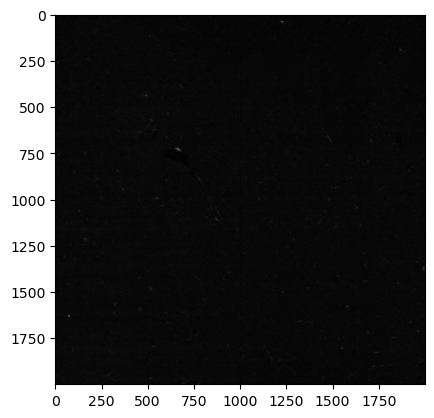

In [3]:
plt.imshow(img, cmap='gray', vmin=0, vmax=255); plt.show()

In [4]:
img_log1p = log1p_jit(img)

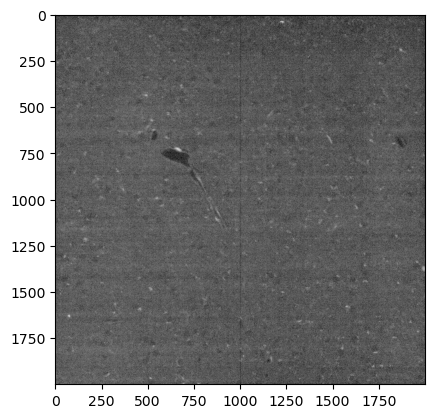

In [5]:
plt.imshow(img_log1p, cmap='gray', vmin=0, vmax=log1p(255)); plt.show()

In [6]:
wavelet = 'db10'
coefficients = wavedec2(img_log1p, wavelet, mode='symmetric', level=None, axes=(-2, -1))
len(coefficients)

7

In [8]:
for idx, coefficient in enumerate(coefficients):
    if idx == 0:
        continue
    print([item.shape for item in coefficient])

[(49, 49), (49, 49), (49, 49)]
[(80, 80), (80, 80), (80, 80)]
[(142, 142), (142, 142), (142, 142)]
[(266, 266), (266, 266), (266, 266)]
[(514, 514), (514, 514), (514, 514)]
[(1009, 1009), (1009, 1009), (1009, 1009)]


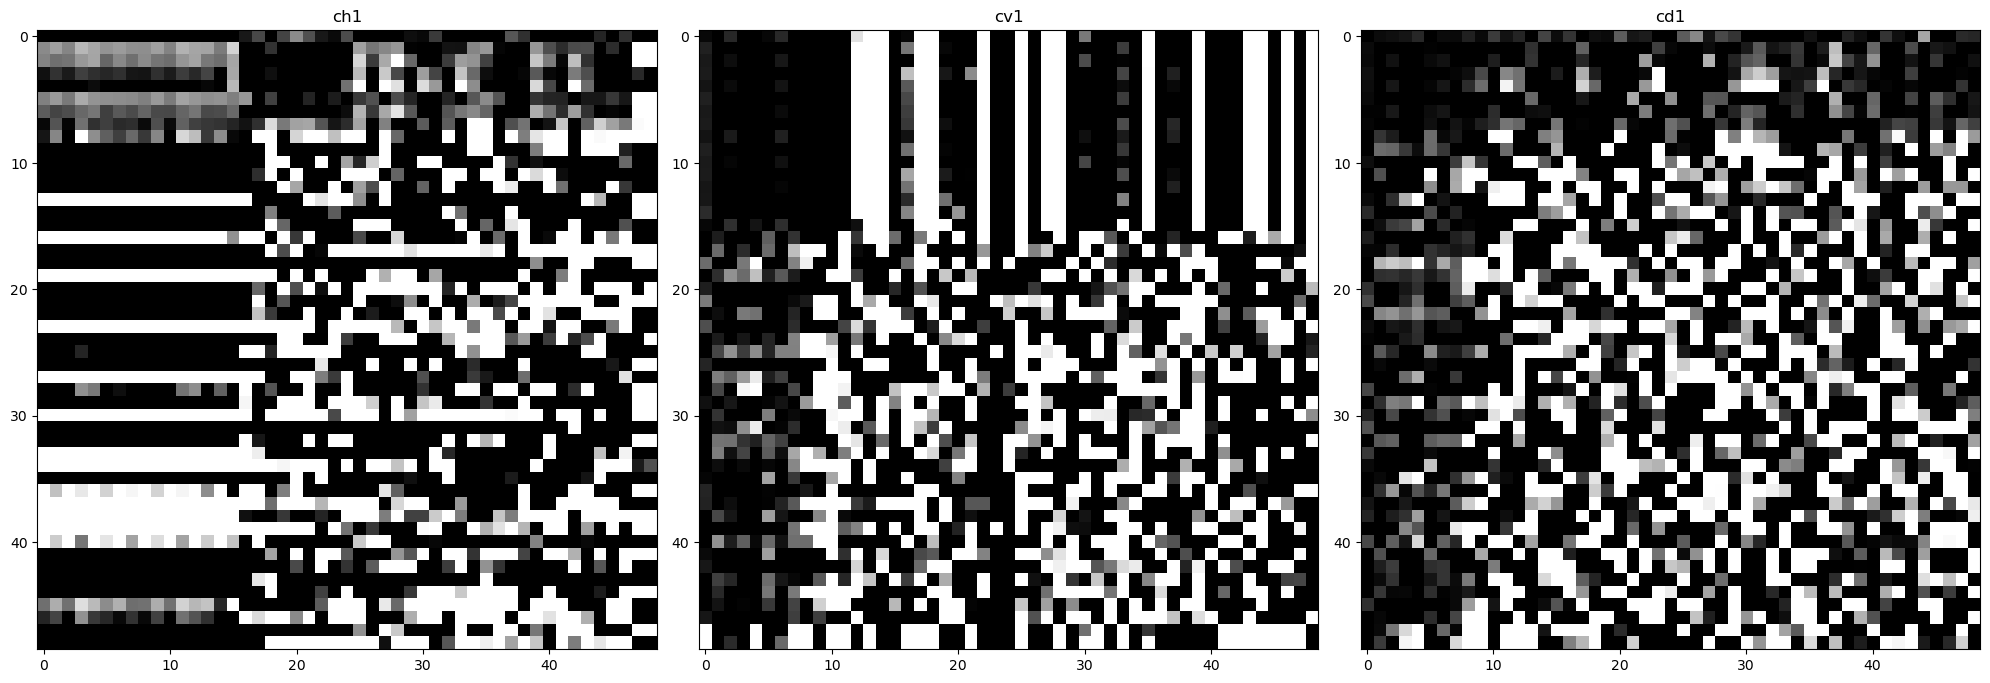

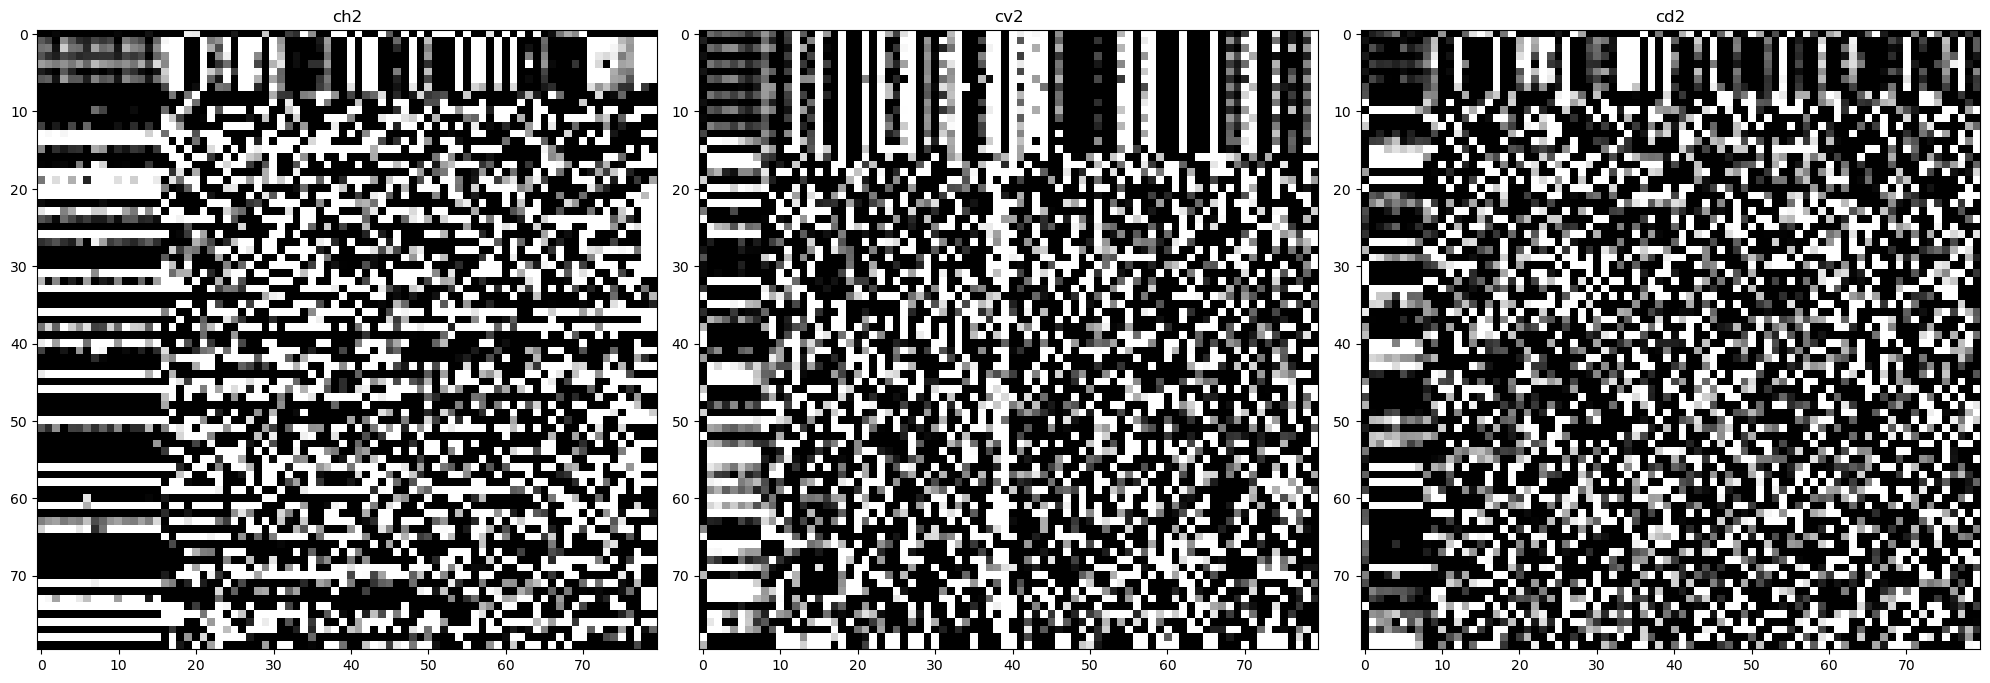

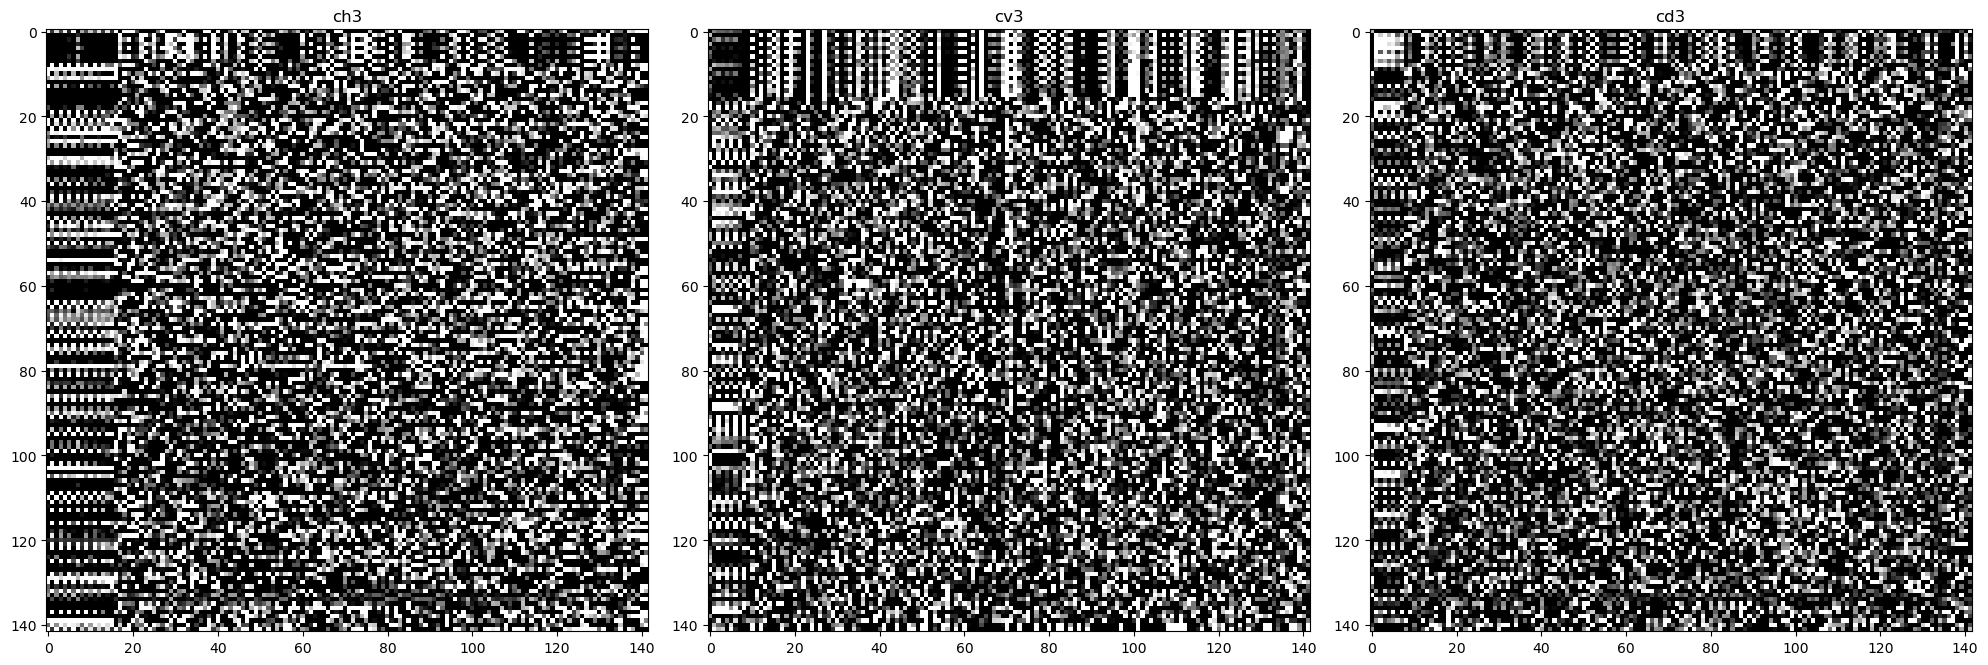

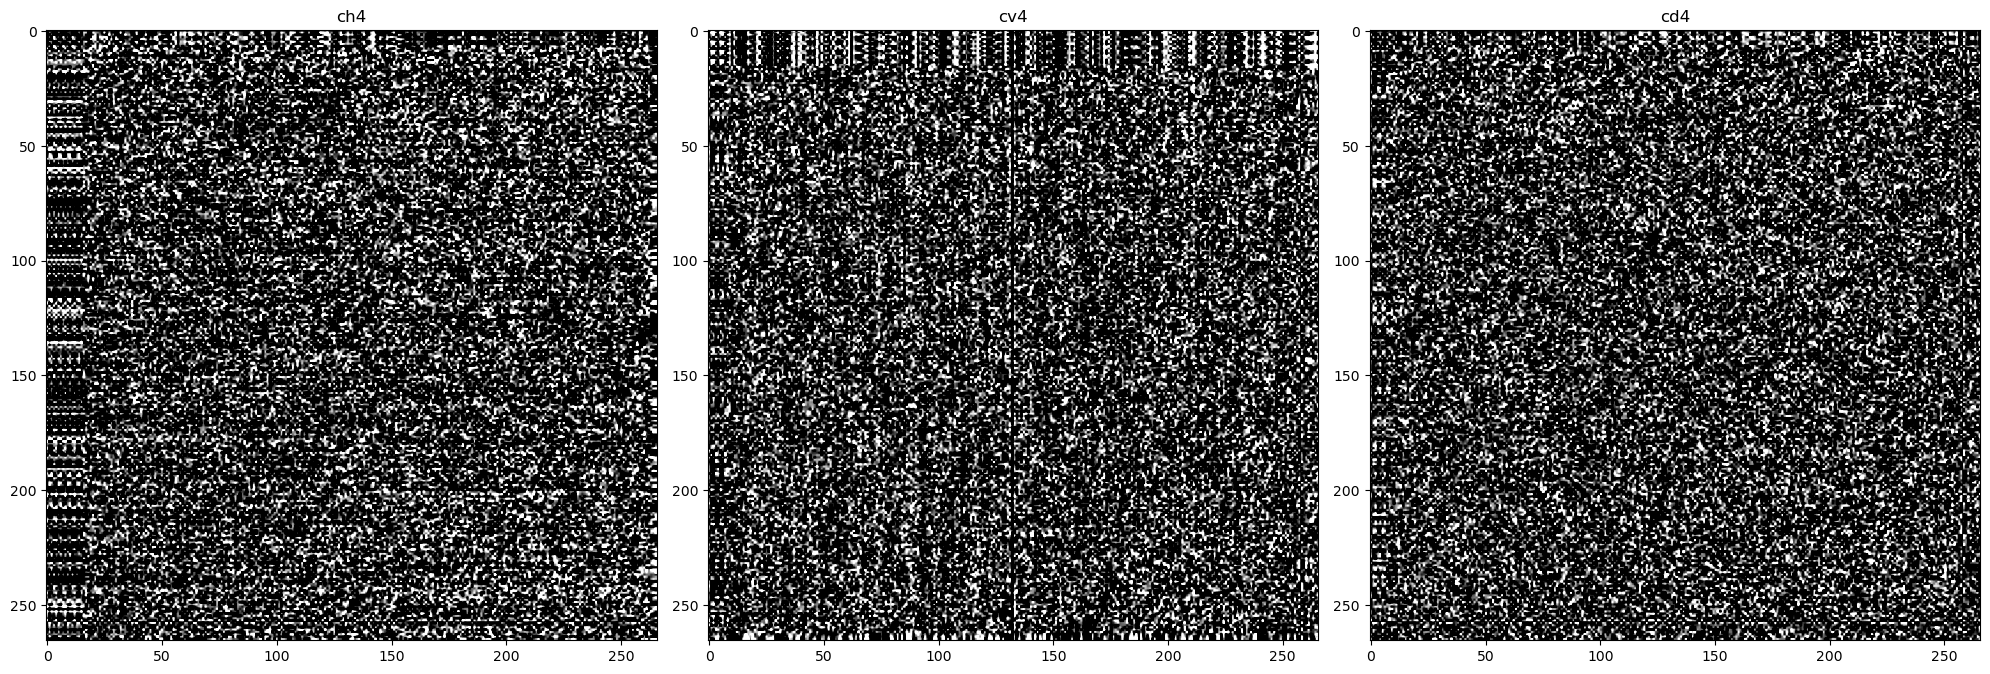

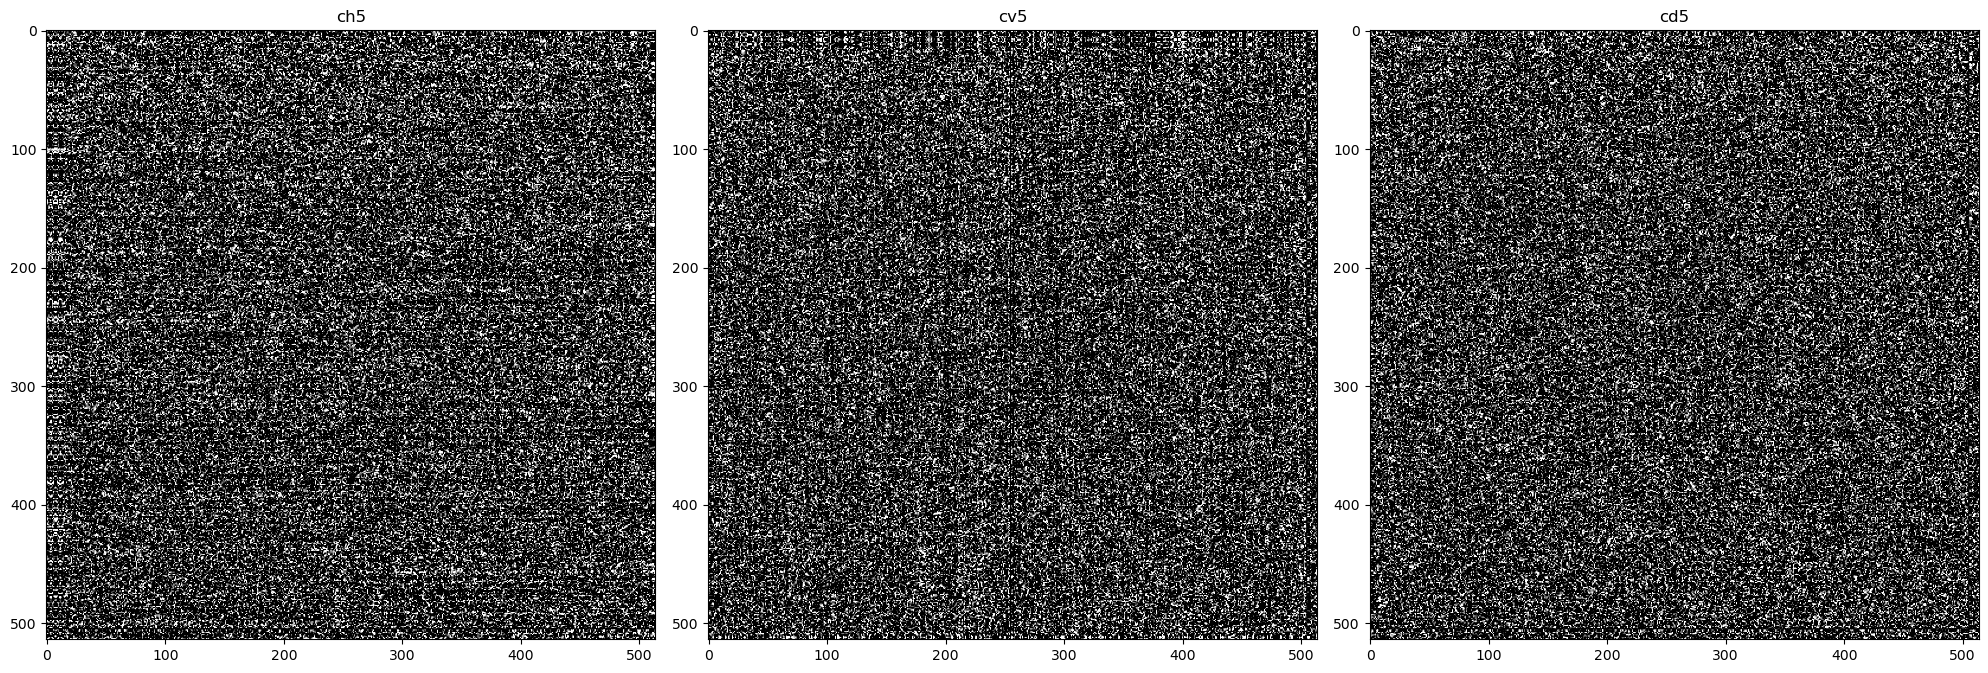

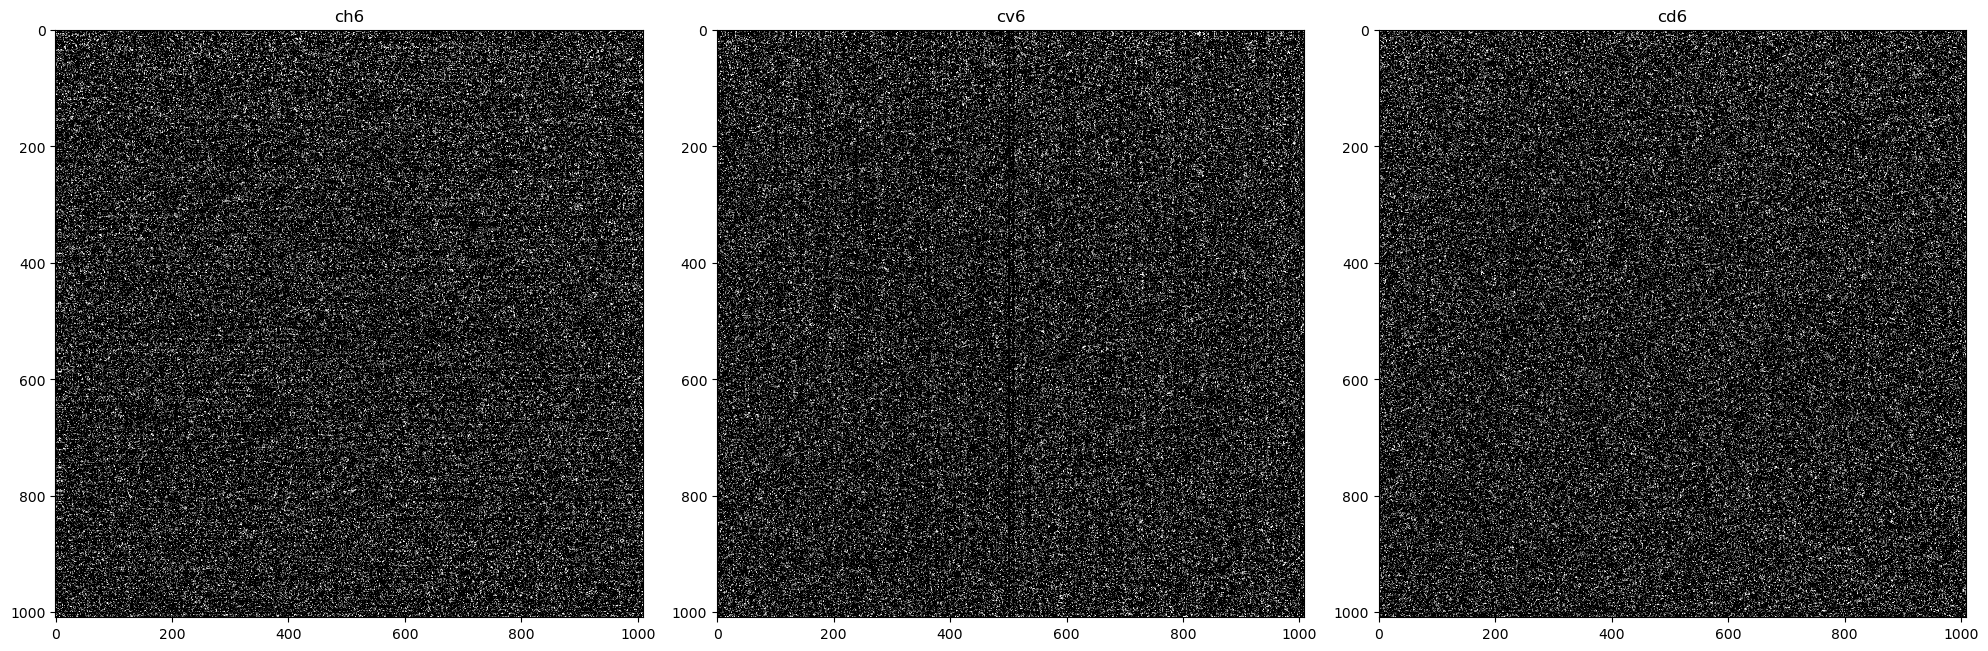

In [9]:
for idx, coefficient in enumerate(coefficients):
    if idx == 0:
        continue
    coefficient = list(e*255 for e in coefficient)
    plot_images(coefficient, [f'ch{idx}', f'cv{idx}', f'cd{idx}'], 255)
# plot_images(coefficients[0], ['a9'], 255)

In [26]:
from torch import tensor
from torch.fft import rfft, irfft
coef = tensor(coefficients[1][0])
print(coef.shape)
coef = rfft(coef, coef.shape[0], -1)
print(coef.shape)
coef

torch.Size([49, 49])
torch.Size([49, 25])


tensor([[ -9.8160+0.0000j,  -5.9001+2.1165j,  -0.8539+3.1261j,
          ...,   0.3391+1.3987j,  -0.9211+0.9982j,
          -0.3947+0.7658j],
        [ 14.6555+0.0000j,   8.6400-2.9177j,   1.5360-4.6249j,
          ...,  -0.6043-2.1066j,   1.3039-1.2791j,
           0.6952-1.0615j],
        [ 13.8850+0.0000j,   6.9675-0.8304j,   2.4025-5.8813j,
          ...,  -0.5229-1.6241j,   1.2430-0.5346j,
           1.4730-1.3598j],
        ...,
        [ 58.9177+0.0000j, -13.1448+16.2071j,  -8.4532+21.8549j,
          ...,  -2.9118-6.2902j,   0.6938+6.6680j,
           1.0641-11.9828j],
        [-87.7914+0.0000j, -11.2710+92.4888j,  10.9312+27.8949j,
          ...,  -0.5345-4.8101j,  -1.6922-5.0766j,
          14.5842-4.7124j],
        [-47.9670+0.0000j, -88.9315+85.1323j,  27.7577+42.3075j,
          ...,  -0.2651-3.0222j,  11.1380-5.2061j,
          -4.2166+6.0960j]])

In [87]:
import numpy as np
nzp_file = Path(r"X:\3D_stitched_LS\20241028_SF231213_04_LS_9x_1400z_ADa8\Downsampled\10.0um\ch0\ch0_zyx10.0um_masked.npz")
img = np.load(nzp_file)["I"]
img -= np.min(img)
img /= np.max(img) 
img *= 255
imwrite(nzp_file.parent.parent / (nzp_file.stem + ".tif"), img.astype(uint8), compression=None)